In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

# Reading the data and top rows

In [2]:
Cardataset = pd.read_csv("C:\DataisGood\Internship\car data.csv")

In [3]:
Cardataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
Cardataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#No of data available in the dataset 301 rows and 9 features and checking missing values

In [6]:
Cardataset.shape
Cardataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
  # To find the number of categories under different headings

In [8]:
print("Fuel TYPE.............." ,Cardataset.Fuel_Type.value_counts())
print("Seller_Type............",Cardataset.Seller_Type.value_counts())
print("Transmission...........", Cardataset.Transmission.value_counts())

Fuel TYPE.............. Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Seller_Type............ Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Transmission........... Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
# Coding of data .. Fuel Type Petrol is indicated with 0, Diesel:1, CNG :2


In [10]:
Cardataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [11]:
print(Cardataset.Fuel_Type)

0      0
1      1
2      0
3      0
4      1
      ..
296    1
297    0
298    0
299    1
300    0
Name: Fuel_Type, Length: 301, dtype: int64


In [12]:
# Coding of data .. Seller_Type  Dealer':0,'Individual':1

In [13]:
Cardataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
print(Cardataset.Seller_Type)

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Seller_Type, Length: 301, dtype: int64


In [14]:
# Coding of data .. Transmission  Manual is indicated with 0, Automatic:1)

In [15]:
Cardataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
print(Cardataset.Transmission)

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Transmission, Length: 301, dtype: int64


In [16]:
Cardataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
#Splitting data to  identify the dependent and independent variable
# Objective is to predict the selling price X is idependent data

In [18]:
X =Cardataset.drop(['Car_Name','Selling_Price'],axis=1)
print("Independent Variables: \n", X)
Y=Cardataset['Selling_Price']
print("Dependent Variables: \n",Y)

Independent Variables: 
      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  

C:\Users\ashma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


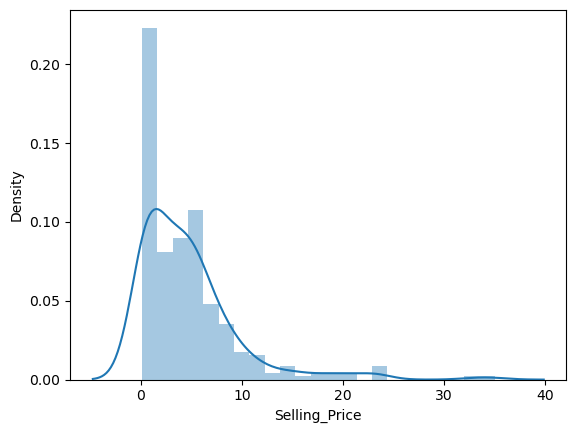

In [19]:
sns.distplot(Cardataset.Selling_Price)
plt.show()

In [20]:
# Splitting the data to Target and Test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)
# 1st ML Algorithm since its to predict selling price will apply LR
linearModelSelling =LinearRegression()
linearModelSelling.fit(X_train,y_train)

LinearRegression()

In [22]:
trainingdata_predict = linearModelSelling.predict(X_train)
print(trainingdata_predict)

[ 6.43468913e+00  2.56619707e+00  2.13929150e+01  4.33510335e+00
  5.62498745e+00  8.76938078e+00  7.36962478e+00  3.25808964e+00
  2.62664818e+00  3.91991750e+00  2.93568875e+00  1.79283628e+00
  6.45576750e+00 -1.85395928e+00  4.34903275e+00  6.87786826e-01
  8.11013360e+00 -3.59329965e+00  2.91574408e+00  1.37061766e+00
  1.08158793e+01  5.75643820e+00  6.41139766e+00  5.40416151e+00
  4.94658036e-01  6.13272195e+00  7.16923008e+00 -1.09304412e-01
  4.87849789e+00  1.11471918e+00  5.88343257e+00  7.43510298e+00
  1.66225000e+00  5.92054051e+00 -1.23623092e+00  7.66793385e-01
 -4.68201893e-01  2.29624869e+00  8.57263107e-01  4.88446925e+00
  6.85501416e+00  5.49711325e-01  6.18346958e+00  3.42262192e-01
  2.01189712e+00  7.01536691e+00  2.80349868e+00  5.84655706e+00
  2.57423028e+00  8.21021183e+00  4.18435352e+00  1.74899448e+00
  6.60928262e-01  7.08850355e+00  9.05203564e+00  1.89316897e+00
  6.24278769e+00  9.06068809e+00  1.05963600e+00  1.44798218e+00
  1.95591318e+00  5.20494

In [23]:
RvalueInModel_r2 = r2_score(y_train,trainingdata_predict)

In [24]:
print("R Square Value",RvalueInModel_r2)

R Square Value 0.8684260777667914


In [25]:
ErrorInModel_mse =mean_squared_error(y_train,trainingdata_predict)
print("MSE Square Value",ErrorInModel_mse)

MSE Square Value 3.3907783842564263


Scatter Plot on Trained Data 



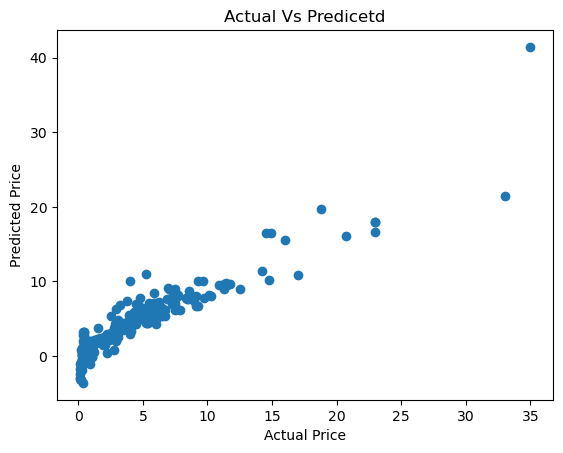

In [26]:
print ("Scatter Plot on Trained Data \n")
plt.scatter(y_train,trainingdata_predict)
plt.title ("Actual Vs Predicetd")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


In [27]:
Testdata_predict = linearModelSelling.predict(X_test)

In [28]:
r_Train_R2 = r2_score(y_test,Testdata_predict)

In [29]:
print("R Square Value for the Test Data", r_Train_R2)

R Square Value for the Test Data 0.9134181721224199


In [30]:
ErrorInModel_Train_MSE = mean_squared_error(y_test,Testdata_predict)

In [31]:
print("Mean Square Error for the Test Data  \n", ErrorInModel_Train_MSE)

Mean Square Error for the Test Data  
 2.1885564456584663


Scatter Plot on Trained Data 



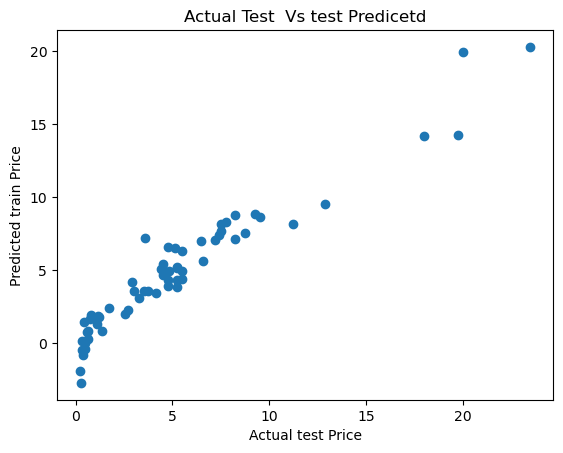

In [32]:
print ("Scatter Plot on Trained Data \n")
plt.scatter(y_test,Testdata_predict)
#plt.plot(y_test,Testdata_predict,color="blue", linewidth=3)
plt.title ("Actual Test  Vs test Predicetd")
plt.xlabel("Actual test Price")
plt.ylabel("Predicted train Price")
#plt.xticks(())
#plt.yticks(())
plt.show()

In [33]:
#lasso regression

#Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

In [34]:
lasso_reg = Lasso(alpha=0.2)

In [35]:
lasso_reg.fit(X_test,y_test)
y_pred_lass =lasso_reg.predict(X_test)
print ("Lasso model:", (lasso_reg.coef_))

Lasso model: [ 4.20621798e-01  6.39420696e-01 -1.27367555e-05  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]


In [36]:
lasso_reg.fit(X_train,y_train)
#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)
print("Lasso Score Train",lasso_reg.score(X_train,y_train))
print("Lasso Score Test",lasso_reg.score(X_test,y_test))


Lasso Score Train 0.8436983478122703
Lasso Score Test 0.8893055014192671


In [37]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
Y_Pred_ridge = ridge.predict(X_test)
print ("Ridge model:", (ridge.coef_))
print("Ridge Score Train",ridge.score(X_train,y_train))
print("Ridge Score Test",ridge.score(X_test,y_test))

Ridge model: [ 3.93422984e-01  4.37241299e-01 -5.43449699e-06  1.43266009e+00
 -1.11321771e+00  1.41487869e+00 -9.68131834e-01]
Ridge Score Train 0.8684223285922801
Ridge Score Test 0.9135150822372119


In [40]:
#Random Forest

In [41]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print ("R square wrt RandomForest", r2_score(y_test, y_pred))

R square wrt RandomForest 0.9577976224999517


In [42]:
print("Lasso Score Test",lasso_reg.score(X_test,y_test))
print("Ridge Score Test",ridge.score(X_test,y_test))
print ("R square wrt RandomForest", r2_score(y_test, y_pred))
print("R Square Value for the Test Data with regression", r_Train_R2)

Lasso Score Test 0.8893055014192671
Ridge Score Test 0.9135150822372119
R square wrt RandomForest 0.9577976224999517
R Square Value for the Test Data with regression 0.9134181721224199


In [ ]:
#The Lasso Regression attained an accuracy of 89% with the given Dataset.
#The Ridge Regression attained an accuracy of 91% with the given Dataset.
# R square value obtained from RandonForest is better hence for the prediction of car selling price Random Forest method is suggested.